# SIFT

In [30]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def pipeline_sift(num, rate):
    MIN_MATCH_COUNT = 10
    path = path = "/kaggle/input/q3-images/Q3/3." + str(num) + ".png"
    img1 = cv2.imread('/kaggle/input/q3-images/Q3/3.0.png',0)
    img2 = cv2.imread(path,0)

    sift = cv2.SIFT_create()

    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(des1, des2, k=2)
    good = []
    for m,n in matches:
        if m.distance < rate * n.distance:
            good.append(m)

    if len(good) > MIN_MATCH_COUNT:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()

        h,w = img1.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)

        img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

    else:
        print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
        matchesMask = None

    draw_params = dict(matchColor = (0,255,0), 
                       singlePointColor = None,
                       matchesMask = matchesMask,
                       flags = 2)

    img3 = cv2.drawMatches(img1, kp1, img2, kp2, good, None, **draw_params)
    plt.title("image" + str(num))
    plt.imshow(img3, 'gray')
    plt.show()

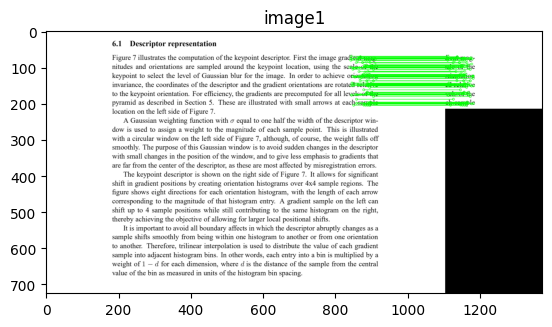

In [31]:
pipeline_sift(1, 0.75)

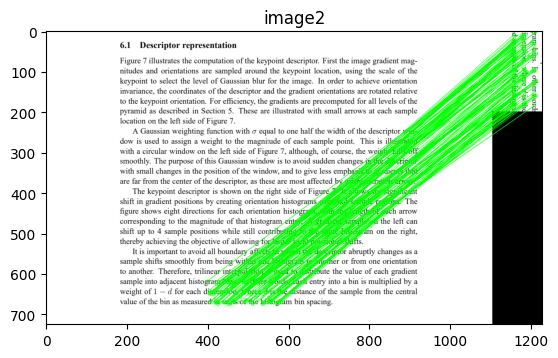

In [32]:
pipeline_sift(2, 0.60)

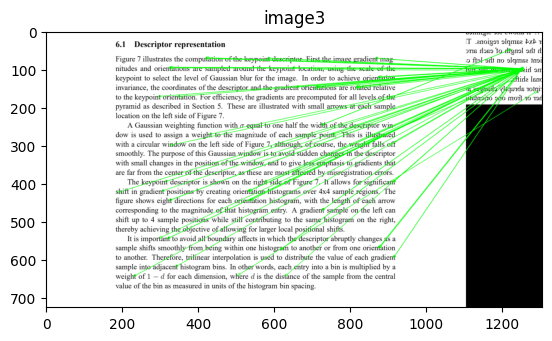

In [86]:
pipeline_sift(3, 0.85)

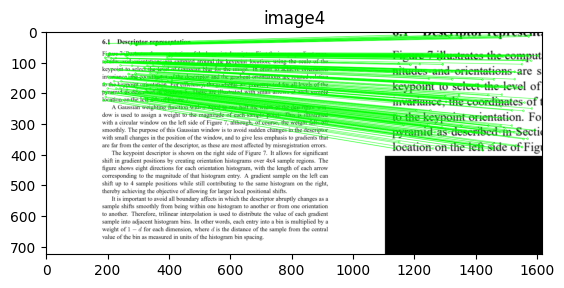

In [49]:
pipeline_sift(4, 0.60)

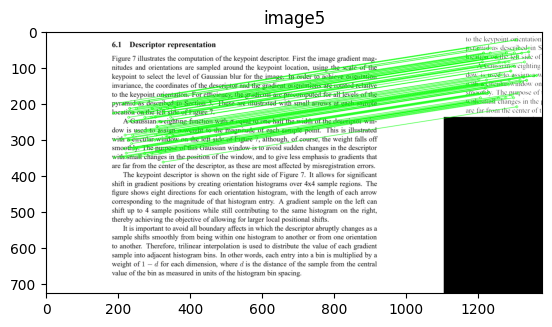

In [50]:
pipeline_sift(5, 0.60)

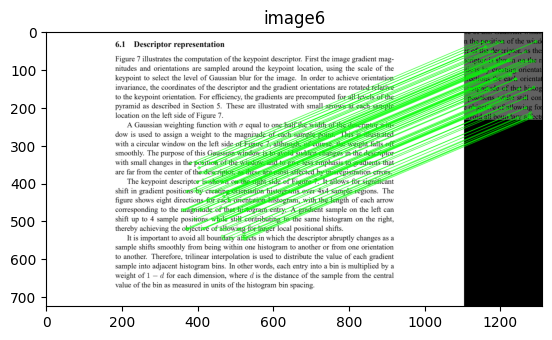

In [53]:
pipeline_sift(6, 0.50)

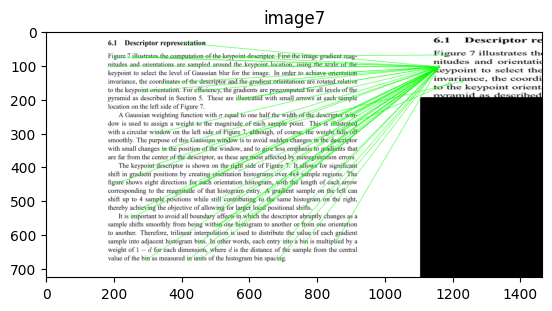

In [80]:
pipeline_sift(7, 0.70)

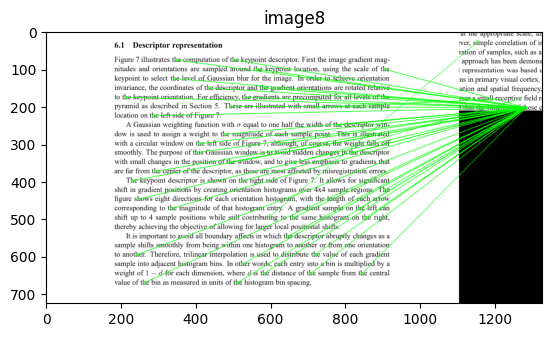

In [71]:
pipeline_sift(8, 0.70)

# HOG

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_template(template, base):
    template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    base_gray = cv2.cvtColor(base, cv2.COLOR_BGR2GRAY)

    template_gray = cv2.resize(template_gray, (template.shape[1], template.shape[0]))
    base_gray = cv2.resize(base_gray, (base.shape[1], base.shape[0]))

    hog = cv2.HOGDescriptor()
    template_hog = hog.compute(template_gray)
    base_hog = hog.compute(base_gray)
    result = cv2.matchTemplate(base_hog, template_hog, cv2.TM_CCOEFF_NORMED)
    threshold = 0.08
    
    loc = np.where(result >= threshold)
    print(result)
    if loc[0].size > 0: 
        print("found match")
    else:
        print("no match")
    base_with_rectangles = base.copy() 
    for pt in zip(*loc[::-1]):
        cv2.rectangle(base_with_rectangles, pt, (pt[0] + template.shape[1], pt[1] + template.shape[0]), (0, 255, 0), 2)

    return base_with_rectangles

Found match at: (832, 0)


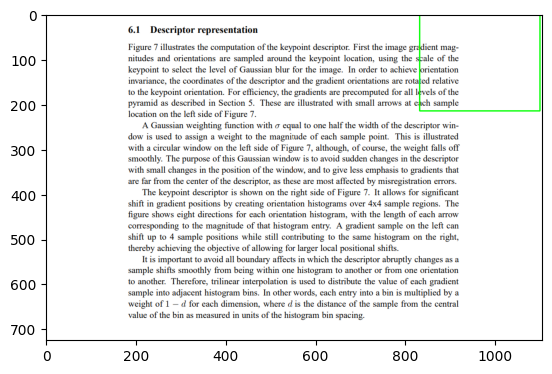

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_template(template, base):
    template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    base_gray = cv2.cvtColor(base, cv2.COLOR_BGR2GRAY)

    hog = cv2.HOGDescriptor()
    template_hog = hog.compute(template_gray)
    win_size = (template.shape[1], template.shape[0])
    step_size = 8

    best_match_val = -1
    best_match_loc = (0, 0)

    for y in range(0, base_gray.shape[0] - win_size[1], step_size):
        for x in range(0, base_gray.shape[1] - win_size[0], step_size):
            window = base_gray[y:y + win_size[1], x:x + win_size[0]]
            window_hog = hog.compute(window)
            similarity = np.dot(template_hog.ravel(), window_hog.ravel())
            if similarity > best_match_val:
                best_match_val = similarity
                best_match_loc = (x, y)

    if best_match_val > 0.08: 
        print("Found match at:", best_match_loc)
        base_with_rectangles = base.copy()
        cv2.rectangle(base_with_rectangles, best_match_loc, (best_match_loc[0] + win_size[0], best_match_loc[1] + win_size[1]), (0, 255, 0), 2)
    else:
        print("No match found")
        base_with_rectangles = base

    return base_with_rectangles

base = cv2.imread('./Q3/3.0.png')
template = cv2.imread('./Q3/3.1.png')

result_image = detect_template(template, base)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.show()


Found match at: (536, 472)


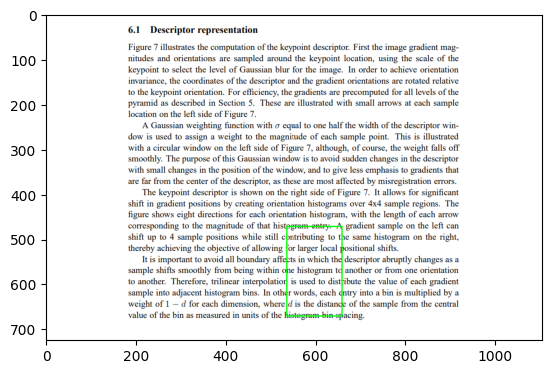

In [5]:
base = cv2.imread('./Q3/3.0.png')
template = cv2.imread('./Q3/3.2.png')

result_image = detect_template(template, base)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.show()

Found match at: (416, 368)


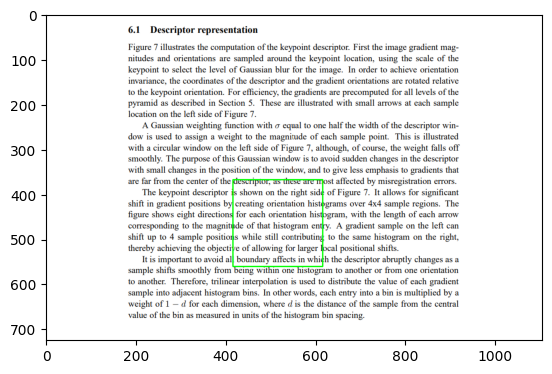

In [6]:
base = cv2.imread('./Q3/3.0.png')
template = cv2.imread('./Q3/3.3.png')

result_image = detect_template(template, base)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.show()

Found match at: (216, 112)


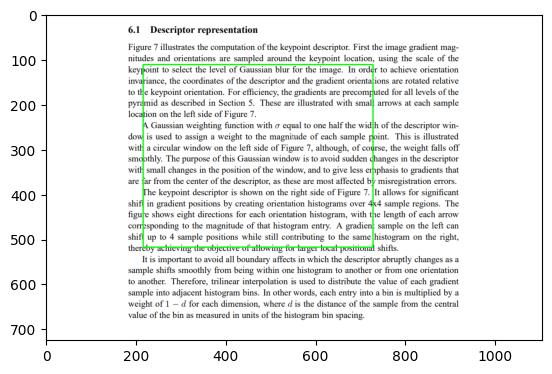

In [7]:
base = cv2.imread('./Q3/3.0.png')
template = cv2.imread('./Q3/3.4.png')

result_image = detect_template(template, base)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.show()

Found match at: (120, 152)


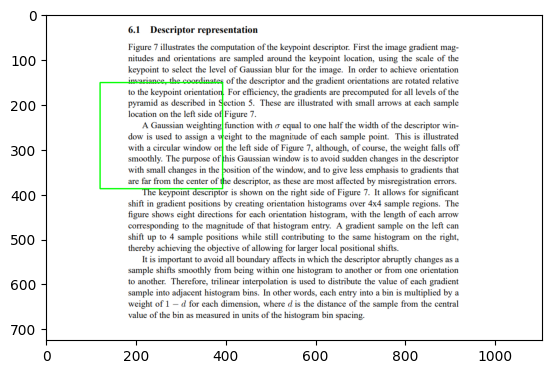

In [8]:
base = cv2.imread('./Q3/3.0.png')
template = cv2.imread('./Q3/3.5.png')

result_image = detect_template(template, base)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.show()

Found match at: (344, 320)


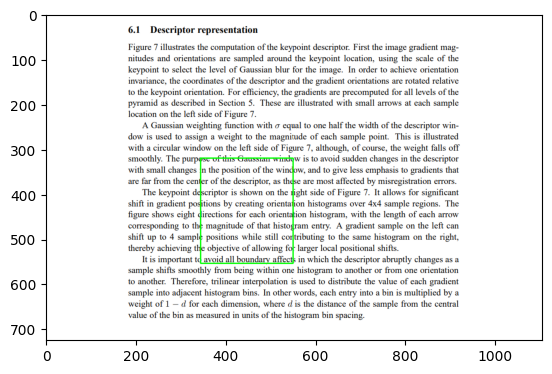

In [9]:
base = cv2.imread('./Q3/3.0.png')
template = cv2.imread('./Q3/3.6.png')

result_image = detect_template(template, base)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.show()

Found match at: (144, 8)


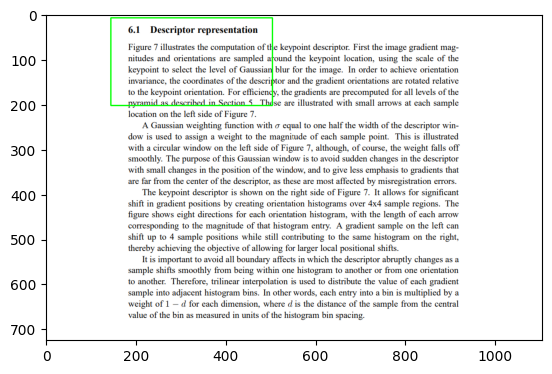

In [10]:
base = cv2.imread('./Q3/3.0.png')
template = cv2.imread('./Q3/3.7.png')

result_image = detect_template(template, base)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.show()

Found match at: (392, 368)


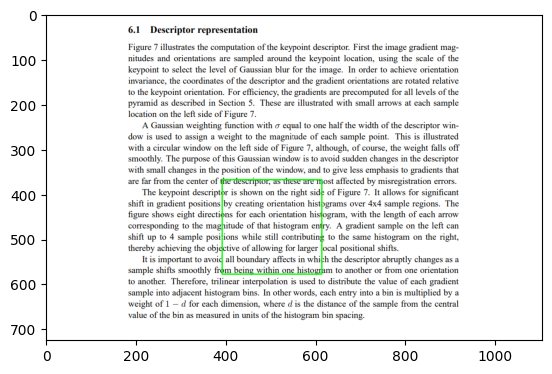

In [11]:
base = cv2.imread('./Q3/3.0.png')
template = cv2.imread('./Q3/3.8.png')

result_image = detect_template(template, base)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.show()